<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-PotterSR/blob/main/Sep29-30/Clase30Sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Primero tenemos que ver si nuestros datos tienene algún error.

- Definimos un modelo:
Para este caso, usamos un modelo lineal
$$ f = w_0 + w_1 x $$

Definimos un $\theta = [w_0, w_1]$.

1) Definimos un $\theta$ inicial.

2) Ahora generamos una propuesta $\theta = [gaussian(\theta_{min}[0], \sigma), gaussian(\theta_{min}[1], \sigma)]$

> Tenemos que generar dos nuevos números para nuestros paramétros, esto con una probabilidad gaussiana centrada en el punto anterior, y con un $\sigma$ predefinido para ambas.

3) Evaluamos los logaritmos.

> $\log(post(\theta_{ini})), \quad  \log(post(\theta_{prop}))$ \\
  Si log(post(\theta_{prop})) $>$ log(post(\theta_{ini}))
  >> Acepto $\theta_{prop}$ \\
     Guardo $\theta_{prop}$ \\
     $ \theta_{ini} = \theta_{prop}$

> Else:
  >> $p_{test} = Uniform(0,1)$ \\
     Si $\log(post(\theta_{prop})) -$ $log(post(\theta_{prop}))$ $> log(P_{test}))$ \\
     >>> Acepto $\theta_{prop}$ \\
     Guardo $\theta_{prop}$ \\
     $ \theta_{ini} = \theta_{prop}$ \\

>> Else: \\
  Regresar al paso (2);



In [104]:
data = np.loadtxt('/content/drive/MyDrive/Data/olympic100m_men.txt', delimiter = ',').T
x = data[0]
y = data[1]

In [105]:
def model(x, theta):
  m, b = theta
  return b + m*x

In [106]:
def Like(y, x, theta):
  log = np.sum((y- model(x, theta))**2)

  return log

In [107]:
def Prior(theta, limits):
  m, b = theta
  if (limits[0] < m < limits[1]) and (limits[2] < b < limits[3]):
    return 0.0
  return -np.inf

In [108]:
limits = [-1.0, 1.0, 20, 50]
sigma_m = .01
sigma_b = .2
paso_i = [-.1, 45]
N = 10

In [137]:
def mc(x, y, pasos, sigma_b, sigma_m, paso_inicial, limits):

  cadena = [paso_inicial]
  theta_old = paso_inicial

  for _ in range(pasos):
    m_new = np.random.normal(theta_old[0], sigma_m)
    b_new = np.random.normal(theta_old[1], sigma_b)
    theta_new = [m_new, b_new]
    #print(theta_new)

    p_new = Like(y, x, theta_new)
    p_old = Like(y, x, theta_old)
    prior_new = Prior(theta_new, limits)
    prior_old = Prior(theta_old, limits)

    p_new = p_new + prior_new
    p_old = p_new + prior_old

    if (p_new > p_new):
      cadena.append(theta_new)
      theta_old = theta_new
    else:
      r = np.random.uniform(0, 1)
      pn = p_new/p_old
      if (pn > r):
        cadena.append(theta_new)
        theta_old = theta_new
      else:
        cadena.append(theta_old)

  cadena = np.array(cadena)
  return cadena


In [121]:
limits = [-1.0, 1.0, 25, 60]
sigma_m = .01
sigma_b = .1
paso_i = [-.1, 35]
N = 10000

In [123]:
cad = mc(x, y, N, sigma_b, sigma_m, paso_i, limits)

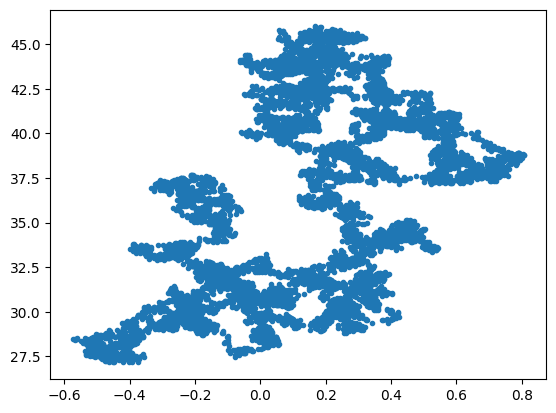

In [124]:
plt.scatter(cad[:,0], cad[:,1], s = None, marker='.')

Text(0.5, 0, 'Paso')

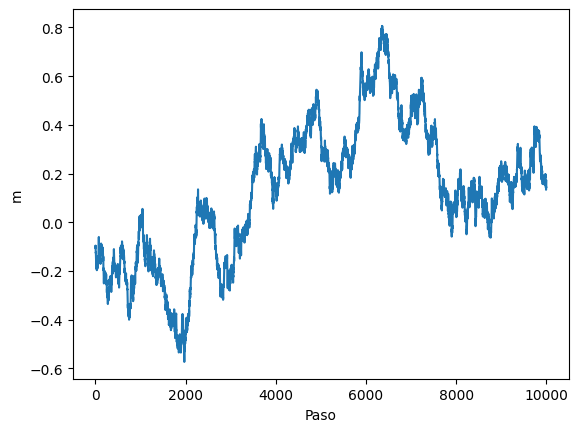

In [125]:
plt.plot(cad[:,0])
plt.ylabel('m')
plt.xlabel('Paso')

Text(0.5, 0, 'Pasos')

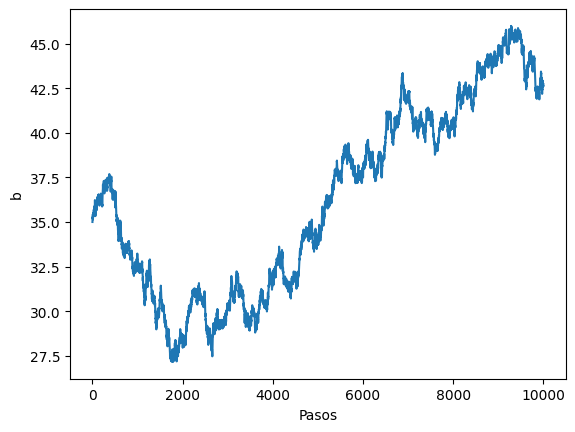

In [126]:
plt.plot(cad[:,1])
plt.ylabel('b')
plt.xlabel('Pasos')


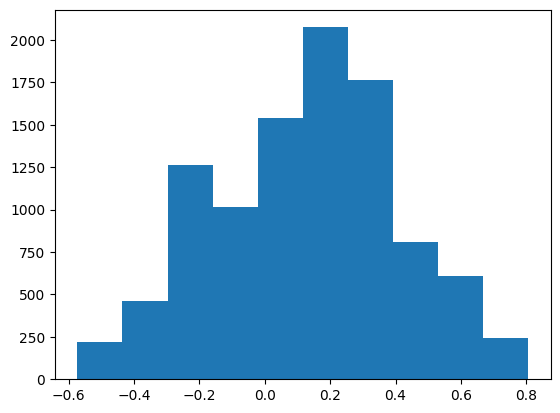

In [127]:
plt.hist(cad[:,0]);

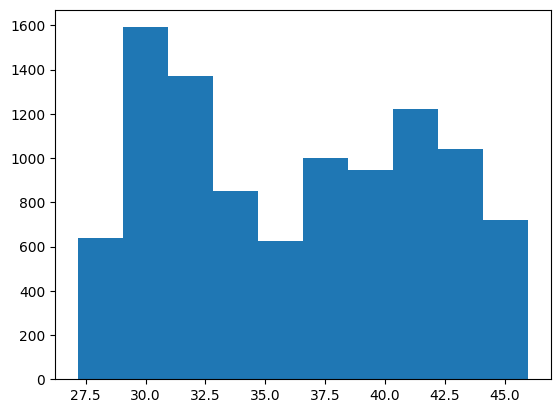

In [128]:
plt.hist(cad[:, 1]);

## Normalizando los datos

In [150]:
x_norm = (x-np.mean(x))/np.std(x)

limits = [-.5, .5, 5, 25]
sigma_m = .001
sigma_b = .1
paso_i = [-.1, 15]
N = 5000

In [151]:
cadena = mc(x_norm, y, N, sigma_b, sigma_m, paso_i, limits)

<ipython-input-138-9b4fd6296495>:25: RuntimeWarning: invalid value encountered in double_scalars
  pn = p_new/p_old


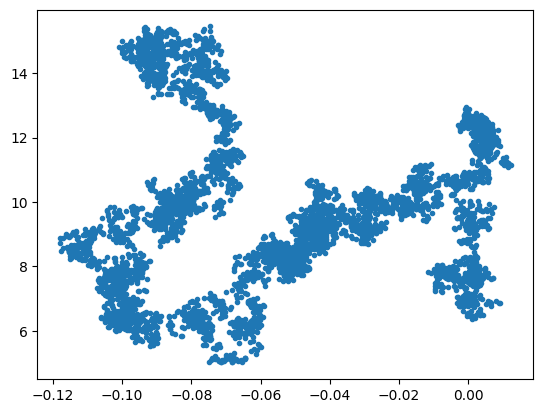

In [152]:
plt.scatter(cadena[:,0], cadena[:,1], s = None, marker='.')

Text(0.5, 0, 'pasos')

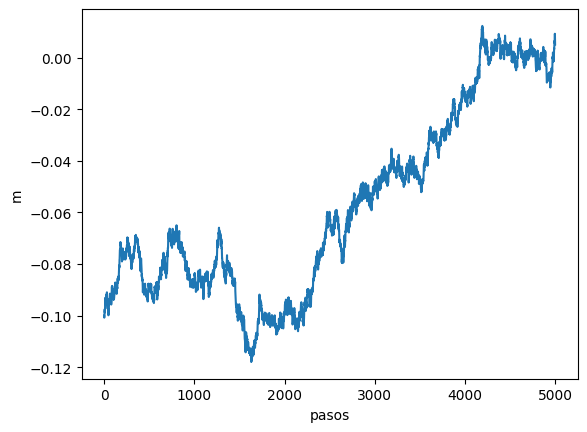

In [153]:
plt.plot(cadena[:,0])
plt.ylabel('m')
plt.xlabel('pasos')

Text(0.5, 0, 'Pasos')

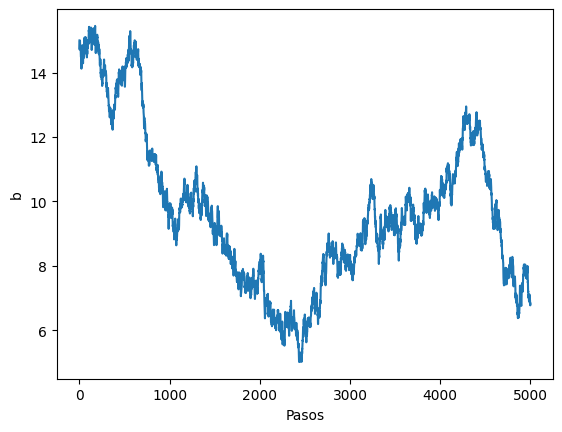

In [154]:
plt.plot(cadena[:,1])
plt.ylabel('b')
plt.xlabel('Pasos')

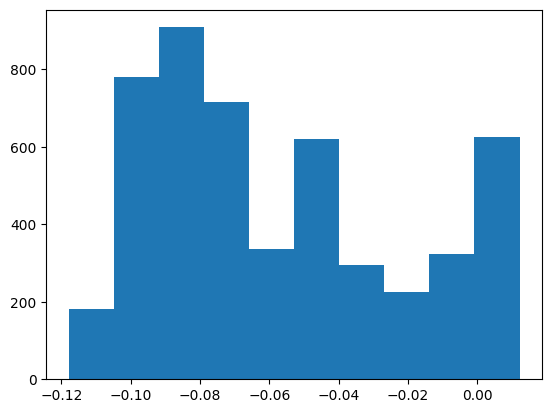

In [155]:
plt.hist(cadena[:,0]);

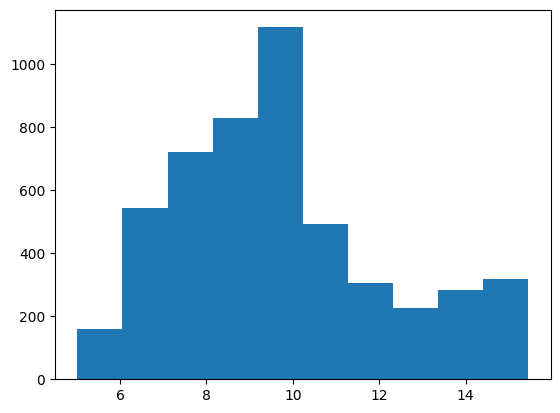

In [157]:
plt.hist(cadena[:,1]);

In [138]:
def mc(x, y, pasos, sigma_b, sigma_m, paso_inicial, limits):

  cadena = [paso_inicial]
  theta_old = paso_inicial

  for _ in range(pasos):
    m_new = np.random.normal(theta_old[0], sigma_m)
    b_new = np.random.normal(theta_old[1], sigma_b)
    theta_new = [m_new, b_new]
    #print(theta_new)

    p_new = Like(y, x, theta_new)
    p_old = Like(y, x, theta_old)
    prior_new = Prior(theta_new, limits)
    prior_old = Prior(theta_old, limits)

    p_new = p_new + prior_new
    p_old = p_new + prior_old

    if (p_new > p_new):
      cadena.append(theta_new)
      theta_old = theta_new
    else:
      r = np.random.uniform(0, 1)
      pn = p_new/p_old
      if (pn > r):
        cadena.append(theta_new)
        theta_old = theta_new
      else:
        cadena.append(theta_old)

  cadena = np.array(cadena)
  return cadena